# Dimensionalidad y Agrupación
## Desafío 1 - Desafío opcional - Dimensionalidad y agrupación (I)
Autor: Walther Becks

### Contexto
Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality
Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar
perfiles de personalidad en base a una serie de oraciones asociadas a las características
Amabilidad, Escrupulosidad, Extroversión, Neuroticismo, Apertura Los individuos deben
responder qué tan adecuada es la oración respecto a su personalidad en base a 6
categorías:

### Desafío 1: Lectura de archivos
* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos bfi.csv y asígnela a un objeto df.
* Solicite las primeras 5 observaciones con head.

In [38]:
import pandas as pd # Librería de manipulación de datos
import numpy as np # Librería de manipulación de datos
import matplotlib.pyplot as plt # Librería de visualización de datos y gráficos
import seaborn as sns # Librería de visualización de datos y gráficos
sns.set_style('darkgrid') # Parte de la librería de seaborn, que permite un estilo distinto al default en visualización
import missingno # Librería de visualización de falta de datos para análisis exploratorio
import warnings # Librería para ignorar las advertencias que arroja Python por cambio de versiones y ver un código más claro
warnings.filterwarnings('ignore') # Importe de la opción de ignorar las advertencias.
import statsmodels.api as sm # Librería que permite funciones y clases para la estimación de múltiples modelos estadísticos, como también pruebas estadisticas y exploración estadística.
import statsmodels.formula.api as smf # Librería que permite la creación del modelo en base a una formula y Data Frame.
import factor_analyzer as fact

# Para dsps:
from sklearn import linear_model # Importe de librería de herramientas de predicción de análisis de datos para modelos lineales
from sklearn.model_selection import train_test_split # Librería para dividir la muestra entre entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score # Librería que importa herramientas de análisis de error cuadratico y error cuadratico medio

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6) # Ampliar las figuras gráficas
plt.rcParams["figure.dpi"] = 200 # Mejora de calidad de los gráficos
pd.set_option('display.max_rows', None) # Opción que permite ver todas las filas al cargar un Data Frame
pd.set_option('display.max_columns', None) # Opción que permite ver todas las columnas de un Data Frame

In [4]:
df = pd.read_csv('bfi.csv')
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Analice el patrón de datos perdidos con missingno. Comente cuáles son las
principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [6]:
df = df.drop('Unnamed: 0',1)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


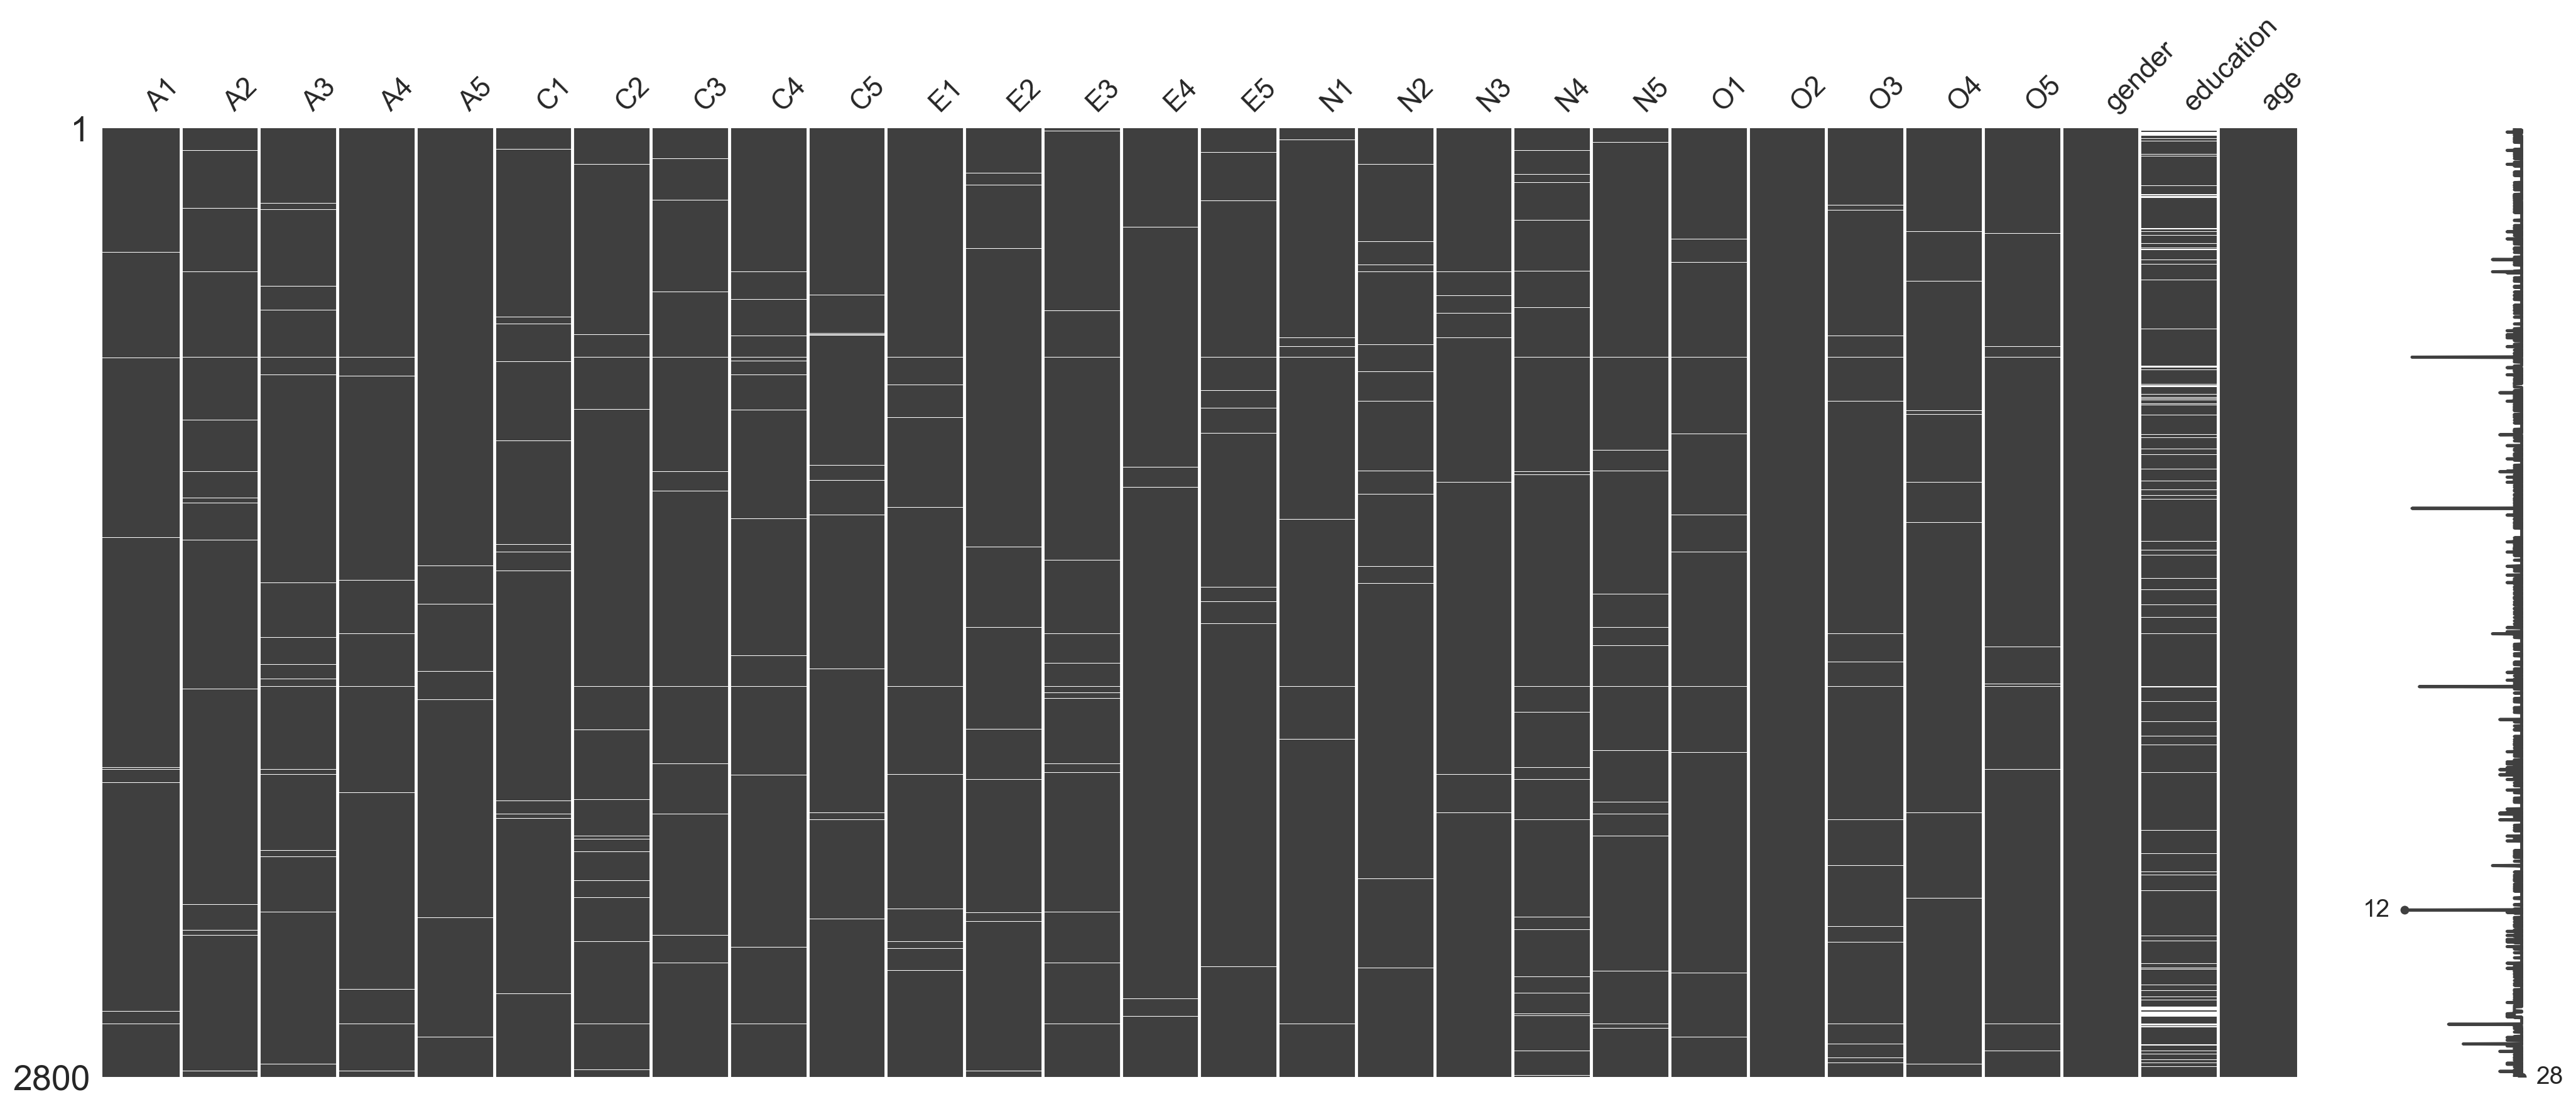

In [8]:
missingno.matrix(df)

In [24]:
print(f"Podemos observar que la columna education es la principal fuente de valores perdidos, con un ~8% {round(df.isna().sum()/len(df)*100,2)}")

Podemos observar que la columna education es la principal fuente de valores perdidos, con un ~8% A1           0.57
A2           0.96
A3           0.93
A4           0.68
A5           0.57
C1           0.75
C2           0.86
C3           0.71
C4           0.93
C5           0.57
E1           0.82
E2           0.57
E3           0.89
E4           0.32
E5           0.75
N1           0.79
N2           0.75
N3           0.39
N4           1.29
N5           1.04
O1           0.79
O2           0.00
O3           1.00
O4           0.50
O5           0.71
gender       0.00
education    7.96
age          0.00
dtype: float64


In [25]:
df = df.dropna()

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [26]:
df_preguntas = df.loc[:,"A1":"O5"]
df_preguntas.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,2.0,1.0,6.0,5.0,6.0,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,6.0,4.0,2.0,1.0,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,3.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


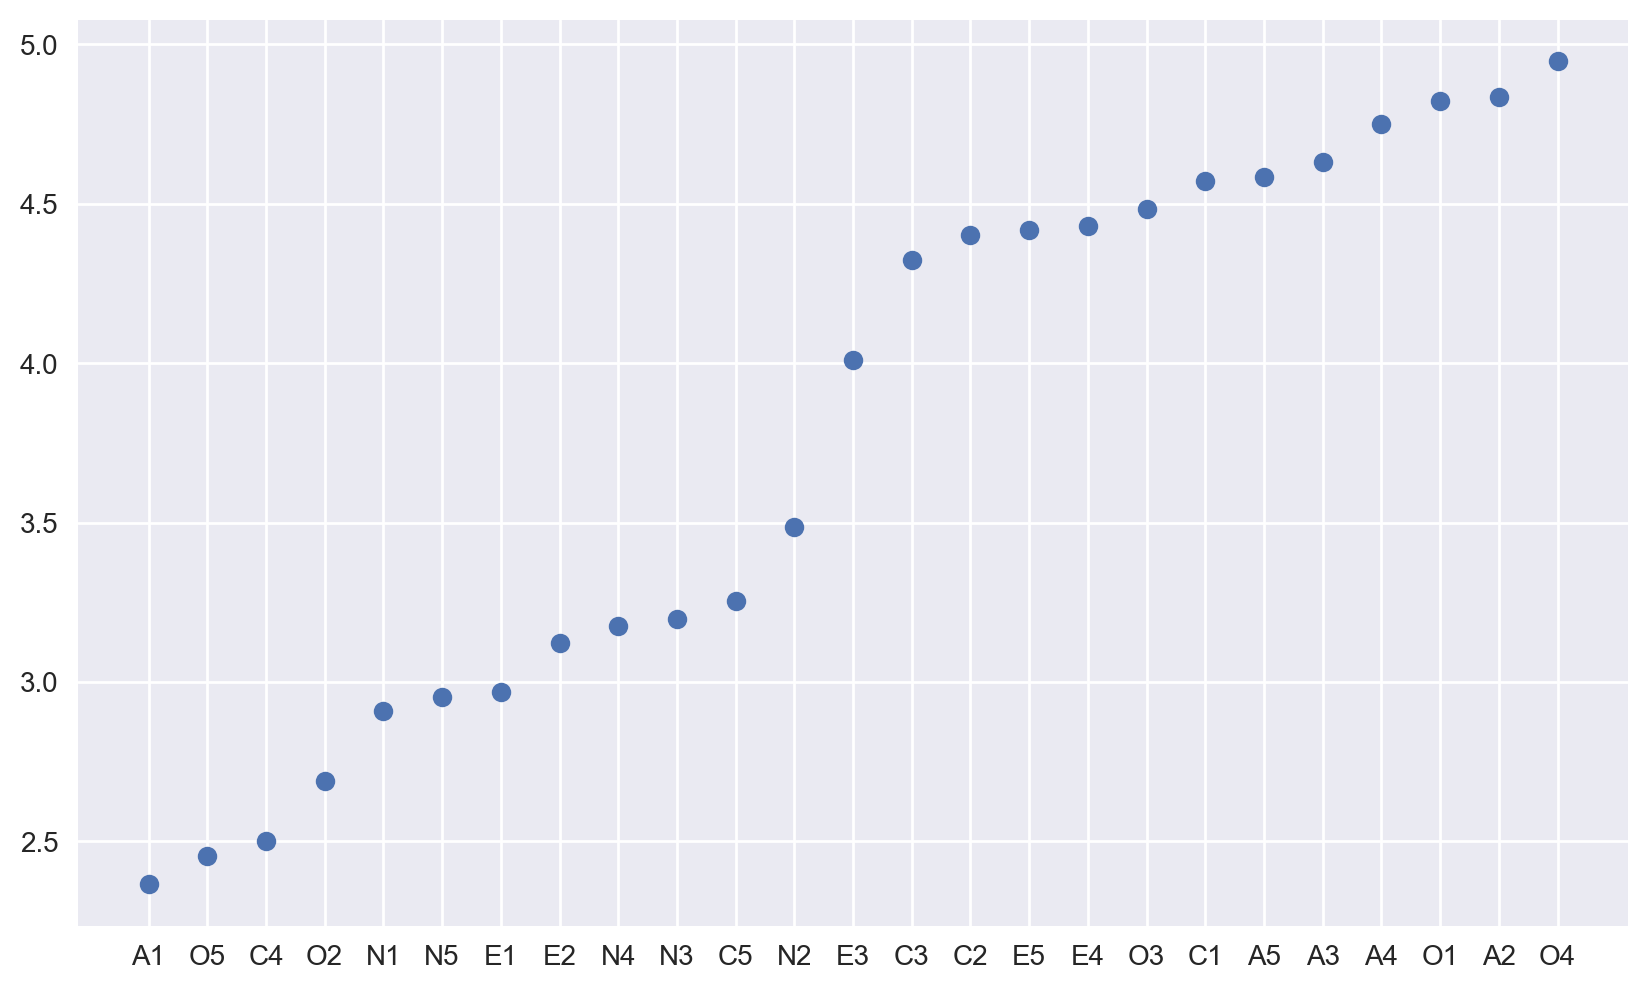

In [27]:
plt.plot(df_preguntas.mean().sort_values(),"o")

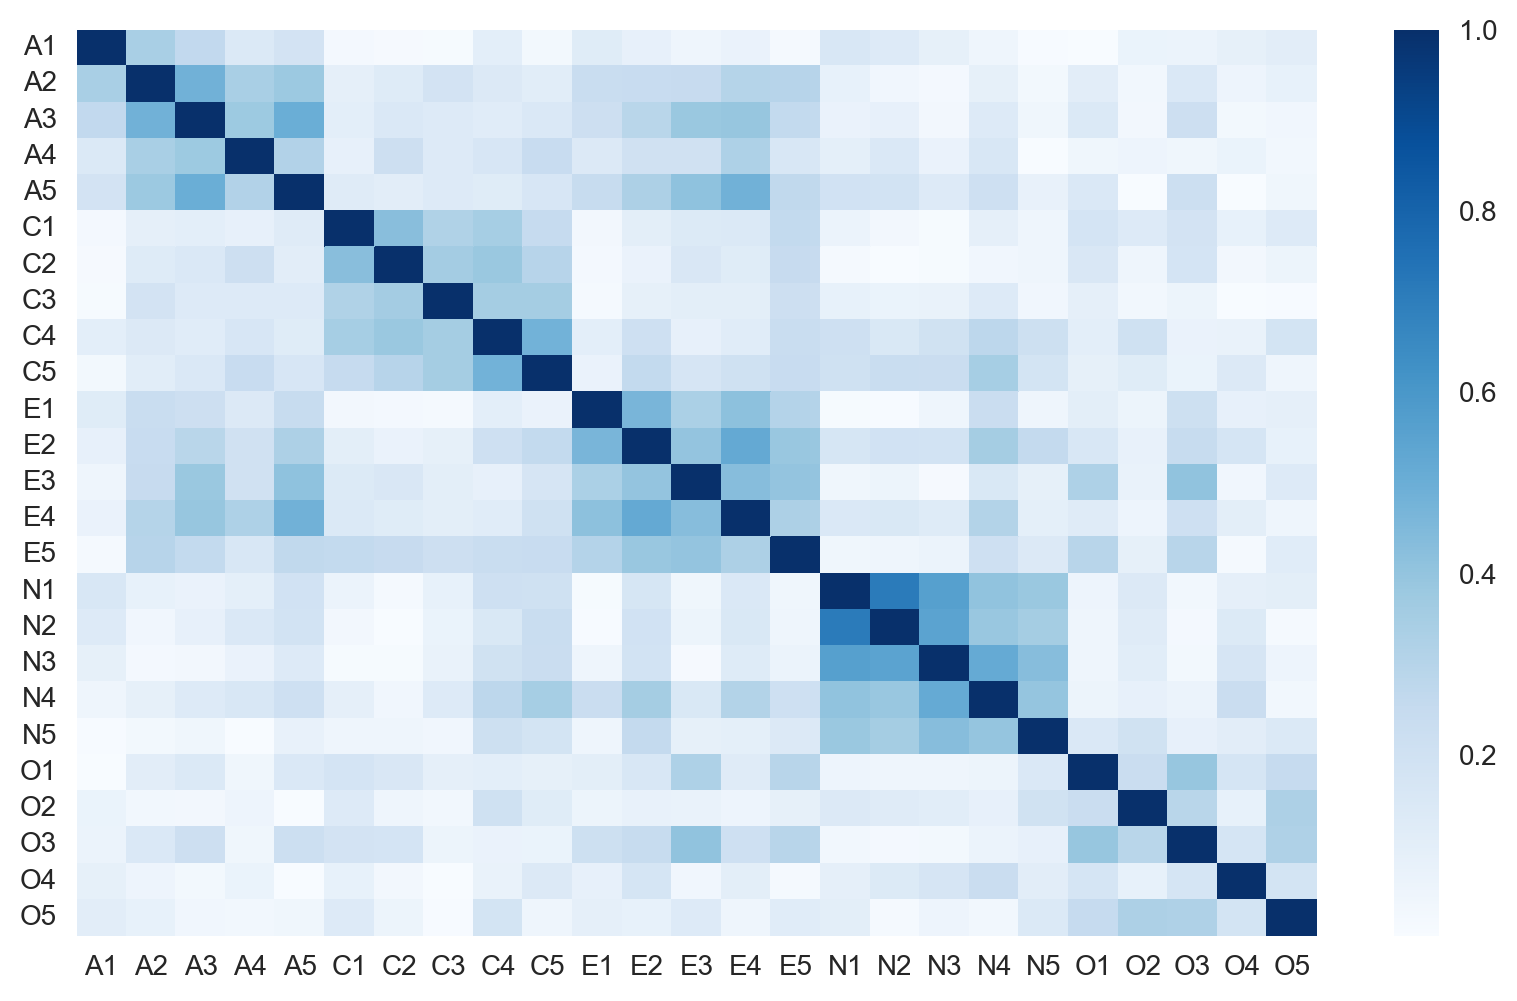

In [33]:
sns.heatmap(df_preguntas.corr().abs(),cmap='Blues')

* Se puede apreciar de que las categorías presentan cierto patrón de correlación

## Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [39]:
estadistico, pvalue = fact.calculate_bartlett_sphericity(df_preguntas)
# Se busca pvalue chico o estadistico grande
assert pvalue <0.05

In [40]:
kmo_ind, kmo_general = fact.calculate_kmo(df_preguntas)
# Evaluar kmo general es mayor a 0.7
assert kmo_general > 0.7

* El análisis factorial se detiene si alguna de estas pruebas falla

Text(0.5, 1.0, 'Scree plot')

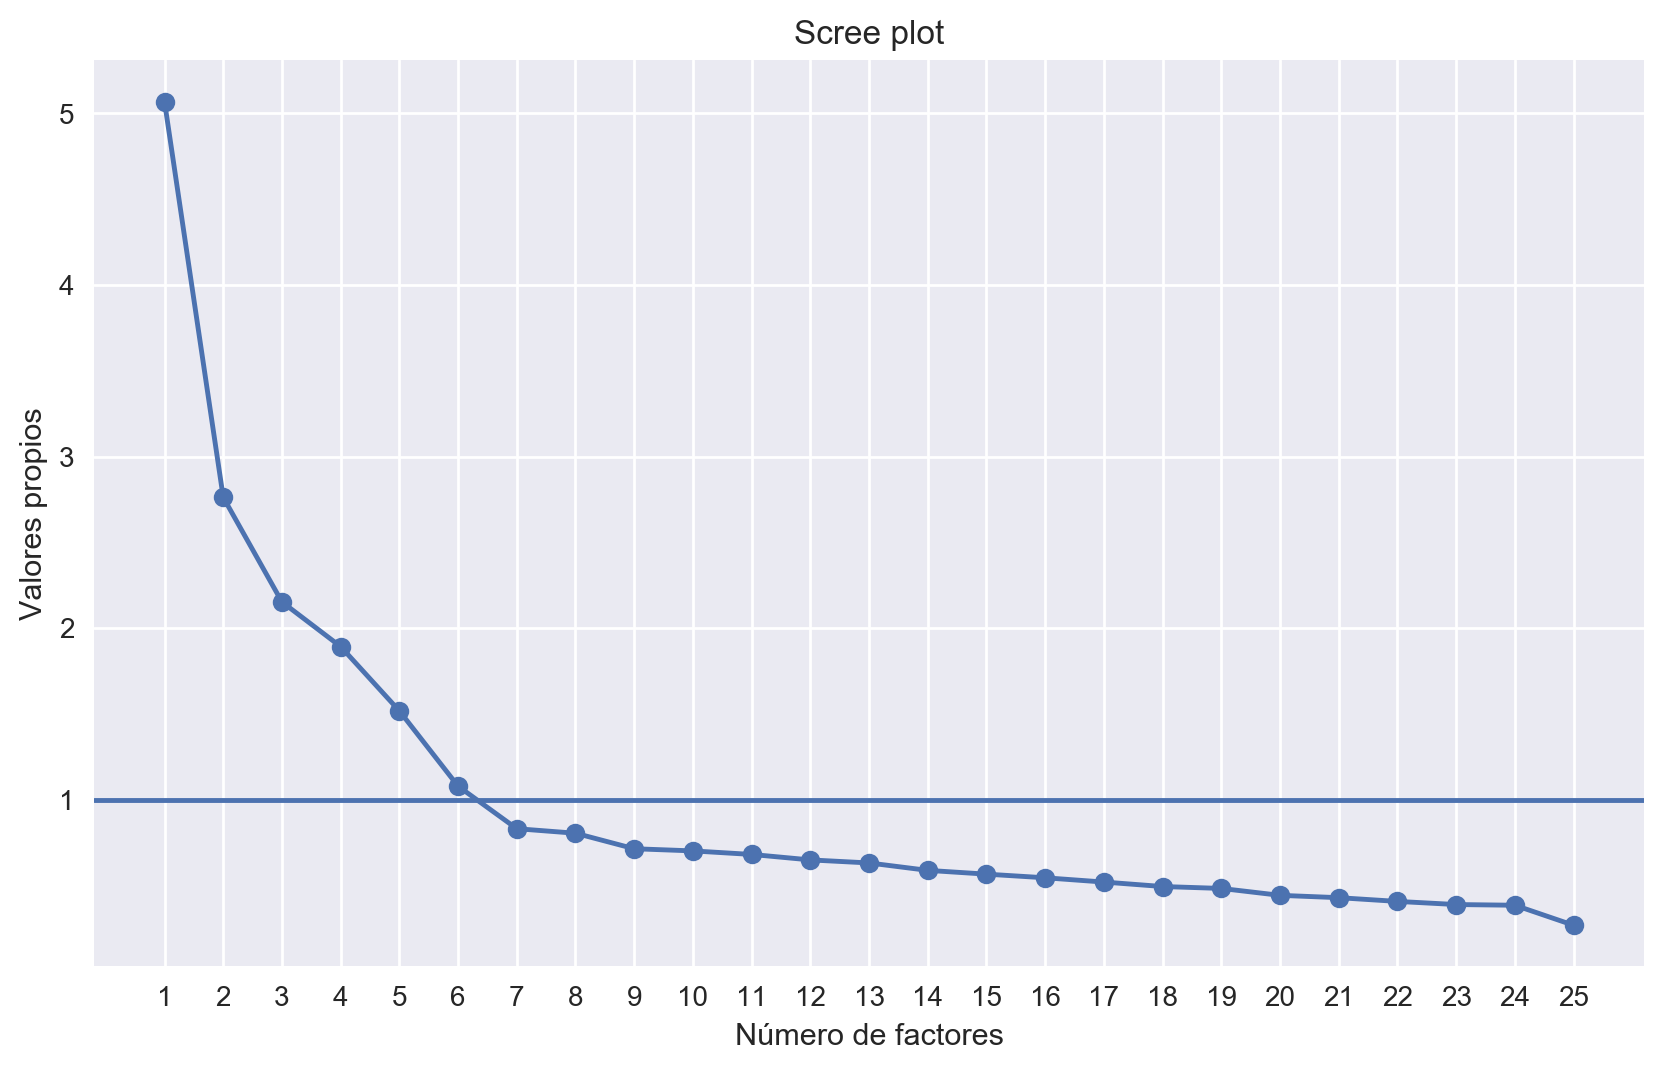

In [43]:
factorize = fact.FactorAnalyzer(n_factors=10, rotation = None).fit(df_preguntas)
# Extracción valores propios
factor_screeplot = factorize.get_eigenvalues()[0]
# Grafico
plt.plot(
    range(1,len(factor_screeplot)+1),
    factor_screeplot,
    'o-'
)
plt.xlabel("Número de factores")
plt.ylabel("Valores propios")
plt.xticks(range(1,len(factor_screeplot)+1))

# Criterio de corte
plt.axhline(1)
plt.title("Scree plot")

In [44]:
factorize_6 = fact.FactorAnalyzer(n_factors=6, rotation=None).fit(df_preguntas)

In [47]:
cargas = pd.DataFrame(factorize_6.loadings_,columns=[f'Factor {i}' for i in range(1,7)],index=df_preguntas.columns)
cargas[cargas >.4].fillna(0).round(3).style.format("{:.2f}").background_gradient(cmap='Purples').applymap(
    lambda x: 'color:transparent' if x == 0 else "")

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.00,0.00,0.00,0.00,0.00,0.00
A2,0.46,0.00,0.00,0.00,0.00,0.00
A3,0.52,0.00,0.00,0.00,0.00,0.00
A4,0.00,0.00,0.00,0.00,0.00,0.00
A5,0.57,0.00,0.00,0.00,0.00,0.00
C1,0.00,0.00,0.44,0.00,0.00,0.00
C2,0.00,0.00,0.46,0.00,0.00,0.00
C3,0.00,0.00,0.00,0.00,0.00,0.00
C4,0.00,0.00,0.00,0.00,0.00,0.00
C5,0.00,0.00,0.00,0.00,0.00,0.00


* Factor 1 = Apertura
* Factor 2 = Neuroticismo
* Factor 3 = Responsabilidad
* Factor 4 = Escrupulosidad

## Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

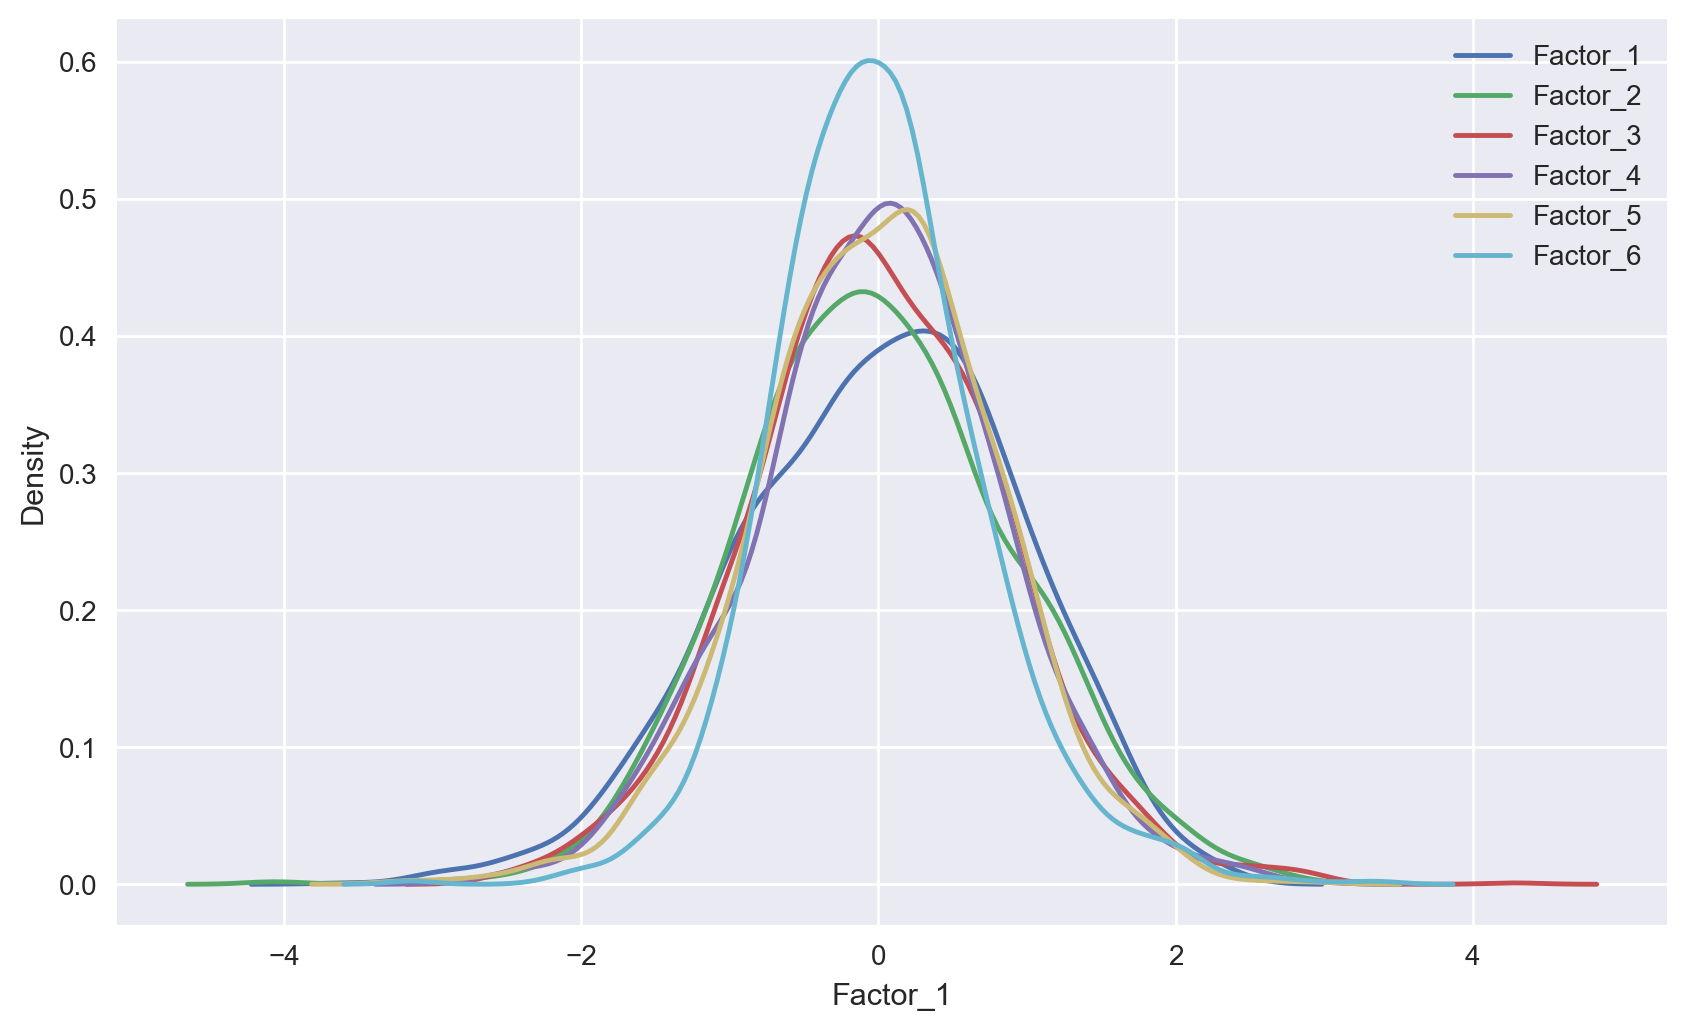

In [48]:
puntajes = pd.DataFrame(factorize_6.transform(df_preguntas),columns=[f"Factor_{i}" for i in range(1,7)])
for i in puntajes.columns:
    sns.kdeplot(puntajes[i],label=i)
plt.legend()


In [54]:
df_model = pd.concat([
    df[['gender','education','age']].reset_index(drop=True),puntajes
],axis=1)

df_model["gender"] = df_model2['gender'].replace([1,2], [1,0])
df_model.head()

,gender,education,age,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,0,3.0,21,1.104750,0.710607,0.777228,0.429006,-0.958366,0.076417
1,1,2.0,19,-2.177680,-0.753407,0.511305,-0.211500,-0.730752,-0.523280
2,1,1.0,21,-0.015513,-0.195295,-0.403276,0.044932,-0.422234,0.065485
3,1,1.0,17,-0.273800,-0.804856,0.925969,0.354409,-1.354209,0.213480
4,1,5.0,68,0.262650,-0.660616,-1.395966,-1.336868,0.644094,-0.395139


In [58]:
modelo_factor1= smf.ols("Factor_1 ~ gender + education + age", data = df_model).fit()
modelo_factor1.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
gender        True
education    False
age           True
Name: P>|t|, dtype: bool

In [57]:
modelo_factor2= smf.ols("Factor_2 ~ gender + education + age", data = df_model).fit()
modelo_factor2.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
gender        True
education    False
age           True
Name: P>|t|, dtype: bool

In [59]:
modelo_factor3= smf.ols("Factor_3 ~ gender + education + age", data = df_model).fit()
modelo_factor3.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
gender        True
education     True
age          False
Name: P>|t|, dtype: bool

In [60]:
modelo_factor4= smf.ols("Factor_4 ~ gender + education + age", data = df_model).fit()
modelo_factor4.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
gender        True
education     True
age          False
Name: P>|t|, dtype: bool

In [61]:
modelo_factor5= smf.ols("Factor_5 ~ gender + education + age", data = df_model).fit()
modelo_factor5.summary2().tables[1]['P>|t|'] < 0.05

Intercept    True
gender       True
education    True
age          True
Name: P>|t|, dtype: bool

In [62]:
modelo_factor6= smf.ols("Factor_6 ~ gender + education + age", data = df_model).fit()
modelo_factor6.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
gender        True
education    False
age           True
Name: P>|t|, dtype: bool

* Para los modelos de los factores 1, 2 y 6 no fueron significativos la variable de educación
* Para los modelos de los factores 3, 4 no fue significativo la variable edad